In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to generate synthetic data
def generate_synthetic_data(start_date, end_date, frequency='H'):
    date_rng = pd.date_range(start=start_date, end=end_date, freq=frequency)
    data = {
        'timestamp': date_rng,
        'sensor_reading': np.random.rand(len(date_rng)) * 100,  # Random sensor readings between 0 and 100
        'equipment_status': np.random.choice(['normal', 'failure'], size=len(date_rng))
    }
    return pd.DataFrame(data)

# Generate synthetic data
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)
synthetic_data = generate_synthetic_data(start_date, end_date)

# Display the first few rows of the synthetic data
print(synthetic_data.head())


            timestamp  sensor_reading equipment_status
0 2023-01-01 00:00:00       66.644797           normal
1 2023-01-01 01:00:00       37.725842           normal
2 2023-01-01 02:00:00       32.233779          failure
3 2023-01-01 03:00:00        9.056327          failure
4 2023-01-01 04:00:00       16.075236          failure


In [2]:
pip install tensorflow pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [5]:
# Save synthetic data to CSV
synthetic_data.to_csv('predictive_maintenance_data.csv', index=False)


In [6]:
# Assuming you have a CSV file with columns: timestamp, sensor_reading, equipment_status
# Adjust the column names accordingly.

# Load the dataset
# Load the dataset
dataset = pd.read_csv("predictive_maintenance_data.csv")


# Convert timestamp to datetime
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

# Sort the data by timestamp
dataset.sort_values('timestamp', inplace=True)

# Normalize sensor readings
scaler = MinMaxScaler()
dataset['sensor_reading'] = scaler.fit_transform(dataset['sensor_reading'].values.reshape(-1, 1))

# Create sequences for LSTM
sequence_length = 10  # Adjust as needed
sequences = []
for i in range(len(dataset) - sequence_length):
    sequences.append(dataset['sensor_reading'].values[i:i+sequence_length])

# Convert sequences to numpy array
sequences = np.array(sequences)

# Create target variable (1 for failure, 0 for normal)
dataset['target'] = 0
# Assuming 'equipment_status' contains labels for failures
dataset.loc[dataset['equipment_status'] == 'failure', 'target'] = 1

# Extract features and target
X = sequences
y = dataset['target'].values[sequence_length:]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
18/18 [==============================] - 8s 101ms/step - loss: 0.6933 - accuracy: 0.5088 - val_loss: 0.6980 - val_accuracy: 0.4825
Epoch 2/10
18/18 [==============================] - 0s 20ms/step - loss: 0.6918 - accuracy: 0.5299 - val_loss: 0.6957 - val_accuracy: 0.4825
Epoch 3/10
18/18 [==============================] - 0s 19ms/step - loss: 0.6914 - accuracy: 0.5299 - val_loss: 0.7000 - val_accuracy: 0.4825
Epoch 4/10
18/18 [==============================] - 0s 19ms/step - loss: 0.6909 - accuracy: 0.5299 - val_loss: 0.6979 - val_accuracy: 0.4825
Epoch 5/10
18/18 [==============================] - 0s 16ms/step - loss: 0.6914 - accuracy: 0.5299 - val_loss: 0.6965 - val_accuracy: 0.4825
Epoch 6/10
18/18 [==============================] - 0s 22ms/step - loss: 0.6912 - accuracy: 0.5299 - val_loss: 0.6998 - val_accuracy: 0.4825
Epoch 7/10
18/18 [==============================] - 0s 20ms/step - loss: 0.6906 - accuracy: 0.5299 - val_loss: 0.6989 - val_accuracy: 0.4825
Epoch 8/10
1

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


5/5 [==============================] - 0s 7ms/step - loss: 0.6970 - accuracy: 0.4825
Test Loss: 0.6969940662384033, Test Accuracy: 0.4825174808502197


In [11]:
# Assuming 'new_data' is a sequence from your dataset for prediction
new_data = np.array([dataset['sensor_reading'].values[-sequence_length:]])
new_data = new_data.reshape((new_data.shape[0], new_data.shape[1], 1))

prediction = model.predict(new_data)
print(f"Predicted Probability of Failure: {prediction[0][0]}")


1/1 [==============================] - 1s 1s/step
Predicted Probability of Failure: 0.5230046510696411


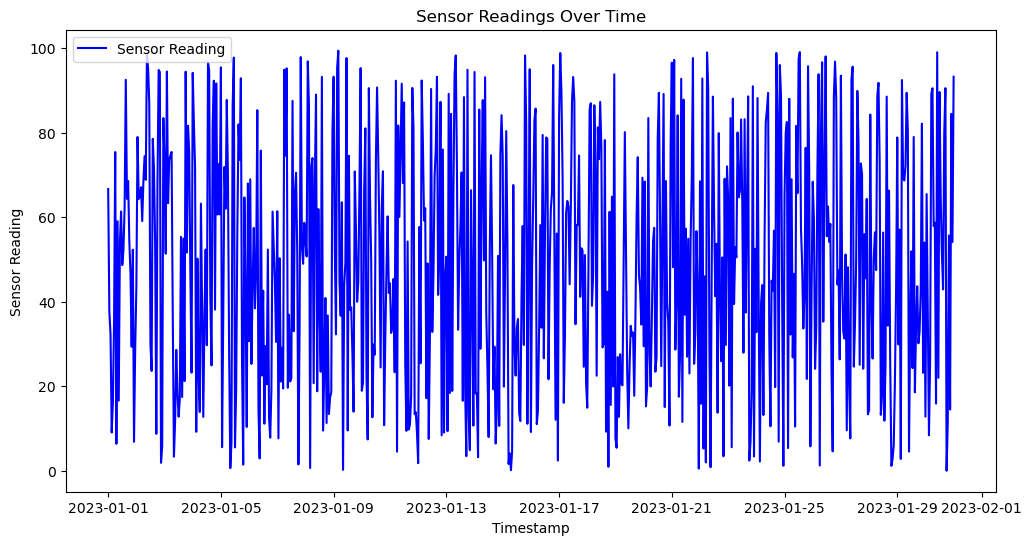

In [14]:
# Plot the sensor readings
plt.figure(figsize=(12, 6))
plt.plot(synthetic_data['timestamp'], synthetic_data['sensor_reading'], label='Sensor Reading', color='blue')
plt.title('Sensor Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.legend()
plt.show()

In [16]:
# Plot the predicted probability of failure
# Assuming 'new_data' is a sequence from your dataset for prediction
new_data = np.array([synthetic_data['sensor_reading'].values[-sequence_length:]])
new_data = new_data.reshape((new_data.shape[0], new_data.shape[1], 1))

prediction = model.predict(new_data)
# Generate timestamps for the last sequence
timestamps_last_sequence = synthetic_data['timestamp'].values[-sequence_length:]

1/1 [==============================] - 0s 19ms/step


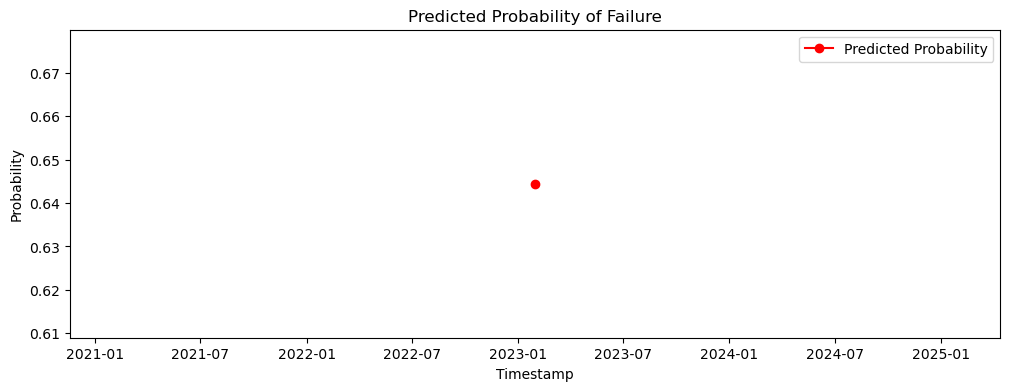

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(timestamps_last_sequence[0],prediction[0],label='Predicted Probability',color='red', marker='o')
plt.title('Predicted Probability of Failure')
plt.xlabel('Timestamp')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [66]:
import numpy as np
import pandas as pd
from subprocess import check_output
from keras.layers import Dense, Activation, Dropout 
from keras.models import Sequential
from sklearn.model_selection import train_test_split 
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [67]:
data=pd.read_excel('C:/Users/thama/prices.xlsx')
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [68]:
data.shape

(851264, 7)

In [69]:
yahoo=data[data['symbol']=='YHOO']
yahoo_stk_prices=yahoo.close.values.astype('float32')

In [70]:
yahoo_stk_prices.shape

(1762,)

In [71]:
yahoo_stk_prices=yahoo_stk_prices.reshape(1762,1)
yahoo_stk_prices.shape


(1762, 1)

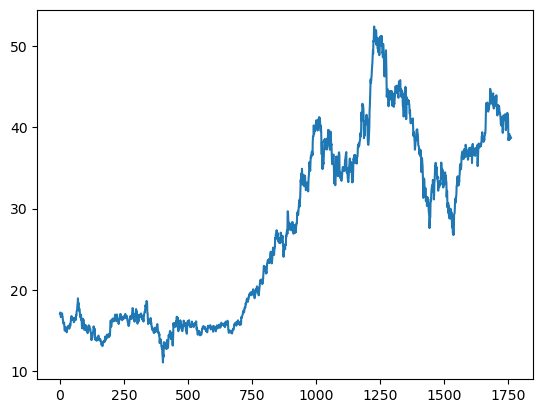

In [72]:
plt.plot(yahoo_stk_prices)
plt.show()

In [73]:
scaler=MinMaxScaler(feature_range=(0,1)) 
yahoo_stk_prices=scaler.fit_transform(yahoo_stk_prices)

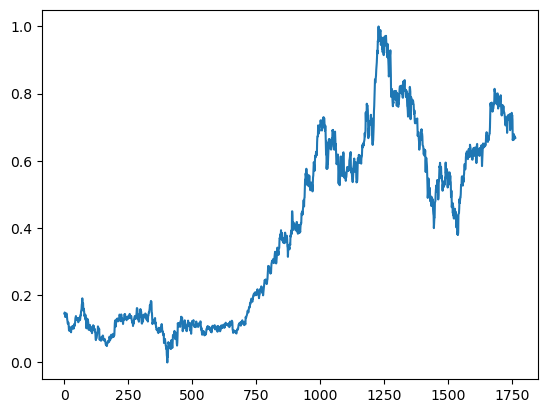

In [74]:
#after scaling
plt.plot(yahoo_stk_prices)
plt.show()

In [75]:
train_size=int(len(yahoo_stk_prices)*0.80) 
test_size=len(yahoo_stk_prices)-train_size 
train,test=yahoo_stk_prices[0: train_size,:], yahoo_stk_prices[train_size:len(yahoo_stk_prices)] 
print(len(train),len(test))

1409 353


In [82]:
# convert an array of values into a dataset matrix 
def create_dataset(dataset, look_back=1): 
    dataX, dataY = [], [] 
    for i in range(len(dataset)-look_back-1): 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX),np.array(dataY)

In [83]:
# reshape into X-t and Y=t+1

look_back= 1
trainX, trainY= create_dataset(train, look_back)
testX, testY= create_dataset(test, look_back)

In [87]:
trainX=np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [90]:
from keras.layers import LSTM

#Step 2 Build Model 
model = Sequential()

model.add(LSTM(units=100, return_sequences=True)) 
model.add(Dropout (0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout (0.2))

model.add(Dense(units=12))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time: ',time.time()-start)

compilation time:  0.03189349174499512


In [92]:
model.fit(trainX, trainY, batch_size=128, epochs=10, validation_split=0.05)

Epoch 1/10
11/11 [==============================] - 8s 168ms/step - loss: 0.1624 - val_loss: 0.4624
Epoch 2/10
11/11 [==============================] - 0s 16ms/step - loss: 0.1414 - val_loss: 0.4084
Epoch 3/10
11/11 [==============================] - 0s 25ms/step - loss: 0.1193 - val_loss: 0.3382
Epoch 4/10
11/11 [==============================] - 0s 15ms/step - loss: 0.0949 - val_loss: 0.2583
Epoch 5/10
11/11 [==============================] - 0s 16ms/step - loss: 0.0731 - val_loss: 0.1827
Epoch 6/10
11/11 [==============================] - 0s 14ms/step - loss: 0.0595 - val_loss: 0.1254
Epoch 7/10
11/11 [==============================] - 0s 13ms/step - loss: 0.0532 - val_loss: 0.1045
Epoch 8/10
11/11 [==============================] - 0s 16ms/step - loss: 0.0487 - val_loss: 0.0884
Epoch 9/10
11/11 [==============================] - 0s 13ms/step - loss: 0.0423 - val_loss: 0.0784
Epoch 10/10
11/11 [==============================] - 0s 13ms/step - loss: 0.0365 - val_loss: 0.0593


1/1 [==============================] - 0s 21ms/step
[[0.4465585  0.45085627 0.4535027  0.4440365  0.44920078 0.43930084
  0.4434431  0.43999738 0.45061433 0.4384673  0.4551234  0.45832673]]
1/1 [==============================] - 1s 1s/step
[[0.86550194 0.8896989  0.9096705  0.8568511  0.88475436 0.8546271
  0.8730706  0.846085   0.898307   0.8437198  0.9091157  0.9134718 ]]
1/1 [==============================] - 0s 23ms/step
[[1.3707039 1.4286964 1.4733409 1.3540355 1.4256222 1.3648151 1.3996105
  1.3408563 1.4523426 1.3418858 1.4726044 1.4744458]]
1/1 [==============================] - 0s 30ms/step
[[1.9545802 2.0619504 2.1327264 1.9287078 2.0666661 1.9709933 2.0144892
  1.9189148 2.1014137 1.9291267 2.1345623 2.1391401]]
1/1 [==============================] - 0s 34ms/step
[[2.5444858 2.7129714 2.8028123 2.5110567 2.7311811 2.6068454 2.642647
  2.510155  2.7621074 2.532519  2.8058968 2.8305023]]
1/1 [==============================] - 0s 40ms/step
[[ 29.523935]
 [ 46.81792 ]
 [ 67.6726

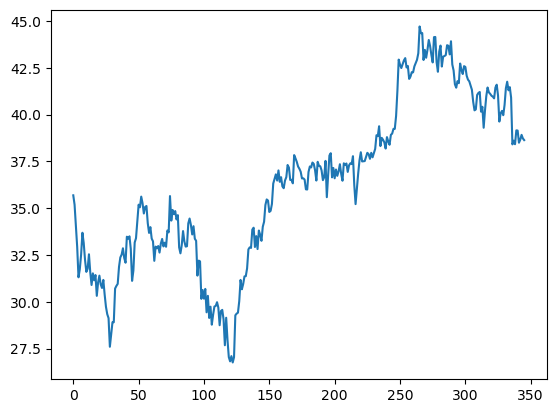

In [104]:
def plt_results_multiple(predicted_data,true_data, length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1,1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1,1))[length:]) 
    plt.show()

#predict Length consecutive values from a real one

def predict_sequences_multiple (model, firstValue, length):
    prediction_seqs = []
    curr_frame = firstValue

    for i in range(length):
        predicted = []
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)

        prediction_seqs.append(predicted[-1])

    return prediction_seqs

predict_length=5
predictions=predict_sequences_multiple(model,testX[0],predict_length) 
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1))) 
plt_results_multiple(predictions,testY,predict_length)